In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load dataset

In [74]:
df = pd.read_csv('hour.csv', index_col='instant')
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [76]:
categories_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'C', 'cnt']
date_columns = ['dteday']

# Data analysis

Drop casual and registered as terms of cnt

In [77]:
df = df.drop(['casual', 'registered'], axis=1)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [78]:
X = df.drop(['cnt'], axis=1)
y = df.loc[:, 'cnt']
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [79]:
y.head()

instant
1    16
2    40
3    32
4    13
5     1
Name: cnt, dtype: int64

<AxesSubplot:>

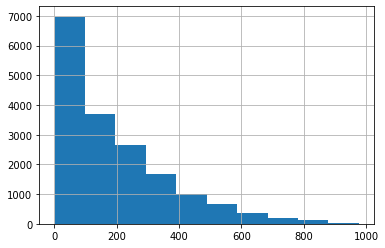

In [80]:
y.hist()

Drop dteday because in year, month

In [81]:
X = X.drop('dteday', axis=1)
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


<AxesSubplot:>

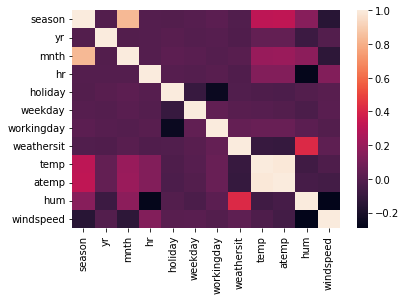

In [82]:
sns.heatmap(X.corr())

High correlation: season and month, temp and atemp. Drop temp

In [83]:
X = X.drop('temp', axis=1)
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
instant,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.2879,0.81,0.0
2,1,0,1,1,0,6,0,1,0.2727,0.80,0.0
3,1,0,1,2,0,6,0,1,0.2727,0.80,0.0
4,1,0,1,3,0,6,0,1,0.2879,0.75,0.0
5,1,0,1,4,0,6,0,1,0.2879,0.75,0.0


In [84]:
pca = PCA(n_components=1)
temp = X.loc[:, ['season', 'mnth']]
temp['year_season'] = pca.fit_transform(temp)
X = X.drop(['season', 'mnth'], axis=1)
X['year_season'] = temp['year_season'] 
X.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,year_season
instant,,,,,,,,,,
1,0,0,0,6,0,1,0.2879,0.81,0.0,5.737711
2,0,1,0,6,0,1,0.2727,0.80,0.0,5.737711
3,0,2,0,6,0,1,0.2727,0.80,0.0,5.737711
4,0,3,0,6,0,1,0.2879,0.75,0.0,5.737711
5,0,4,0,6,0,1,0.2879,0.75,0.0,5.737711
